In [1]:
# core imports
import os
import logging
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# third-party imports
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

# local imports
from data_sources import updated_nasdaq_symbols, get_api_keys
from util import configure_logger

%matplotlib inline

# get all API keys
api_keys = get_api_keys()

# configure the logger
logger = configure_logger(name="stock_learn", level="INFO")


In [3]:
# update/load data
symbols = updated_nasdaq_symbols()

print symbols.head()


2017-11-12 10:13:44,256 INFO stock_learn: [MainProcess:45124] NASDAQ symbols found in a local file, not querying to update.


  Symbol                                      Security Name
0      A            Agilent Technologies, Inc. Common Stock
1     AA                    Alcoa Corporation Common Stock 
2   AAAP  Advanced Accelerator Applications S.A. - Ameri...
3    AAC                    AAC Holdings, Inc. Common Stock
4   AADR                AdvisorShares Dorsey Wright ADR ETF


In [4]:
# initialize alpha vantage classes
ts = TimeSeries(key=api_keys["alpha_vantage"], output_format="pandas")
ti = TechIndicators(key=api_keys["alpha_vantage"], output_format="pandas")


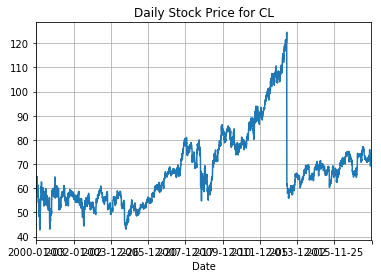

In [5]:
# choose a random stock to plot
random_ind = np.random.choice(symbols.index)
curr_symbol, name = symbols.iloc[random_ind].values

# view the time series data
ts_data, ts_meta = ts.get_daily(symbol=curr_symbol, outputsize="full")
ts_data["close"].plot()
plt.title("Daily Stock Price for %s" % curr_symbol)
plt.grid(True)
    

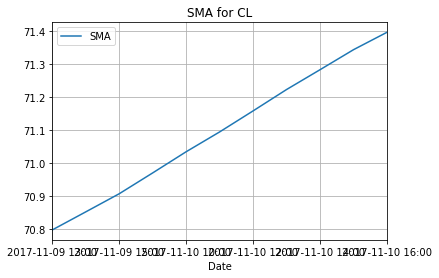

In [6]:
# view the technical indicator data
ti_data, ti_meta = ti.get_sma(symbol=curr_symbol, interval="60min", time_period=60)
ti_data.plot()
plt.title("SMA for %s" % curr_symbol)
plt.grid(True)
